# Análise de sobre o valor de frete praticado em diferentes regiões

## Dúvida da área de negócios
* **Existe diferença no valor do frete praticado em regiões/cidades diferentes? Ou podemos aplicar as mesmas regras de subsídio de frete para qualquer localidade?**

* **Resposta:** 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from datetime import datetime

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Carregando bases de dados

In [3]:
df_customers = pd.read_csv('../datasets/olist_customers_dataset.csv', encoding='ISO-8859-1')
df_geolocation = pd.read_csv('../datasets/olist_geolocation_dataset.csv', encoding='ISO-8859-1')
df_order_items = pd.read_csv('../datasets/olist_order_items_dataset.csv', encoding='ISO-8859-1')
df_order_payments = pd.read_csv('../datasets/olist_order_payments_dataset.csv', encoding='ISO-8859-1')
df_order_reviews = pd.read_csv('../datasets/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
df_orders = pd.read_csv('../datasets/olist_orders_dataset.csv', encoding='ISO-8859-1')
df_products = pd.read_csv('../datasets/olist_products_dataset.csv', encoding='ISO-8859-1')
df_sellers = pd.read_csv('../datasets/olist_sellers_dataset.csv', encoding='ISO-8859-1')
df_product_category_name_translation = pd.read_csv('../datasets/product_category_name_translation.csv', encoding='ISO-8859-1')

## Base de Clientes

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Base de Lojistas

In [5]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Base de Geolocalizações

In [6]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Base de Pedidos

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Itens do pedido

In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Forma de pagamento de cada pedido

In [9]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Retorno de clientes sobre a compra realizada

In [10]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Dados cadastrais de cada produto

In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Tradução das categorias de produtos

In [12]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [34]:
df_mg_orders_customers_sellers = df_orders.merge(df_order_items, on='order_id')
df_mg_orders_customers_sellers = mg_orders_customers_sellers.merge(df_customers, on='customer_id')
df_mg_orders_customers_sellers = mg_orders_customers_sellers.merge(df_sellers, on='seller_id')

In [35]:
df_geolocation_sellers = df_geolocation.rename(columns={'geolocation_zip_code_prefix':'seller_zip_code_prefix',
                                                       'geolocation_lat':'geolocation_lat_seller',
                                                       'geolocation_lng':'geolocation_lng_seller',
                                                       'geolocation_city':'geolocation_city_seller',
                                                       'geolocation_state':'geolocation_state_seller'}).drop_duplicates('seller_zip_code_prefix')

In [36]:
df_geolocation_customers = df_geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix',
                                                       'geolocation_lat':'geolocation_lat_customer',
                                                       'geolocation_lng':'geolocation_lng_customer',
                                                       'geolocation_city':'geolocation_city_customer',
                                                       'geolocation_state':'geolocation_state_customer'}).drop_duplicates('customer_zip_code_prefix')

In [37]:
df_mg_orders_customers_sellers = mg_orders_customers_sellers.merge(df_geolocation_sellers, on='seller_zip_code_prefix')
df_mg_orders_customers_sellers = mg_orders_customers_sellers.merge(df_geolocation_customers, on='customer_zip_code_prefix')

In [38]:
df_mg_orders_customers_sellers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_city_seller,geolocation_state_seller,geolocation_lat_customer_x,geolocation_lng_customer_x,geolocation_city_customer_x,geolocation_state_customer_x,geolocation_lat_customer_y,geolocation_lng_customer_y,geolocation_city_customer_y,geolocation_state_customer_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,-23.574809,-46.587471,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04 00:00:00,1,6cc44821f36f3156c782da72dd634e47,...,piracicaba,SP,-23.574809,-46.587471,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04 00:00:00,2,6cc44821f36f3156c782da72dd634e47,...,piracicaba,SP,-23.574809,-46.587471,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,1,9abb00920aae319ef9eba674b7d2e6ff,...,guarulhos,SP,-23.574809,-46.587471,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,...,maua,SP,-23.482623,-46.374490,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP


In [42]:
round(df_mg_orders_customers_sellers['freight_value'].mean(),2)

19.98

In [43]:
round(df_mg_orders_customers_sellers['freight_value'].std(),2)

15.82

In [44]:
round(df_mg_orders_customers_sellers['freight_value'].var(),2)

250.27

In [39]:
df_orders_freight_value.to_csv('../datasets/df_mg_orders_customers_sellers.csv')

In [40]:
gp = df_mg_orders_customers_sellers.groupby(by='customer_state')['freight_value'].mean().to_frame()
gp.reset_index(inplace=True)

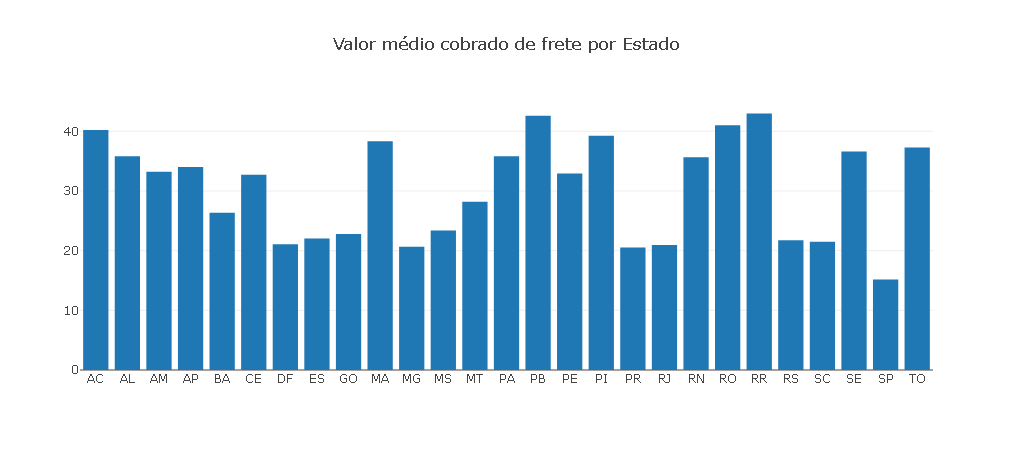

In [41]:
freight_value_mean_state = [go.Bar(x=gp['customer_state'], y=gp['freight_value'])]

layout = go.Layout(title='Valor médio cobrado de frete por Estado')

fig = go.Figure(data=freight_value_mean_state, layout=layout)

py.iplot(fig)